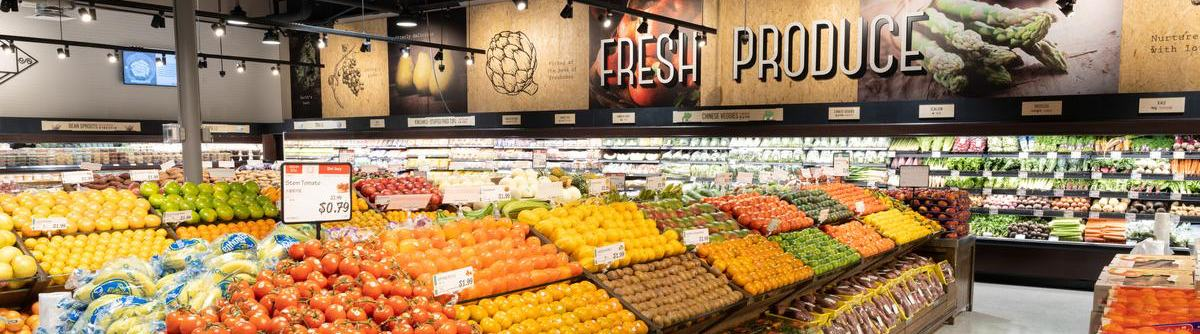

# Predict Future Sales

## Overview
Train data is given a variety of information, but Test data is not given much information. <br/>
So we have to learn Train data in a time series and then predict sales volume for the next month based on Test data. <br/>
We believe that various datasets should be flexibly used to create data that the model can learn. <br/>

#### My Opinion
* 1) Let's visualize the time-series elements of the data to understand the patterns.
* 2) The input dimension of the model learned with Train data should be well thought out and predicted with Test data.

***

## My workflow
#### 1. Import & Install libray
* Import Basic libray
* Import Enginnering libray

#### 2. Check out my data
* Check Shape / Info

#### 3. Exploratory Data Analysis(EDA) with Visualization [with Preprocessing]
* Check "item_price", "item_cnt_day" columns outlier
* Plot the Destribute "Shop ID" count of train data
* Plot Destribute "Item Categori" count of train data
* Plot the sales figures for each store.

#### 4. Feature Engineering
* Get "item_cnt_month" column
* Drop rows with columns "date_block_num", "shop_id", and "item_id"
* Collect information about prices for items_id and Normalize prices
* Drop columns what the model does not help to learn.

#### 5.Modeling
##### 1) Arima Modeling
* Get sample data
* Check the "Trend / Seasonal / Residual" in train data
* Check ACF / PACF
* Differencing train data
* ARIMA Modeling
* ARIMA Model's Prediction

##### 2) LightGBM Modeling
* Divide the data into training, testing and evaluatio
* Training

#### 6. Submission
* Submit the predictions

# 1. Import & Install libray
* Import Basic libray
* Import Enginnering libray

In [ ]:
import re
import os
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

%matplotlib inline

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler



In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 2. Check out my data
* Check Shape / Info

In [ ]:
item_categories_df = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv')
print("item_categories_df Shape : {}".format(item_categories_df.shape))
item_categories_df.head()

In [ ]:
shops_df = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/shops.csv')
shops_df.head()

In [ ]:
items_df = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/items.csv')
print("items_df Shape : {}".format(items_df.shape))
items_df.head()

In [ ]:
test_df = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')
train_df = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
print("train dataset Shape : {}".format(train_df.shape))
train_df.head()

In [ ]:
print("train dataset Shape : {}".format(train_df.shape))
print("test dataset Shape : {}".format(test_df.shape))

In [ ]:
train_df.info()

In [ ]:
train_df.describe()

In [ ]:
sns.color_palette("YlOrRd",  as_cmap=True)

In [ ]:
Reds_palette = sns.color_palette("Reds", 10)
YlOrBr_palette = sns.color_palette("YlOrRd", 10)

sns.palplot(Reds_palette)
sns.palplot(YlOrBr_palette)

#### ✔️ This notebook will use this palettes.

# 3. Exploratory Data Analysis(EDA) with Visualization [with Preprocessing]
* Check "item_price", "item_cnt_day" columns outlier
* Plot the Destribute "Shop ID" count of train data
* Plot Destribute "Item Categori" count of train data
* Plot the sales figures for each store.

In [ ]:
train_df.head()

### 3-1) Check "item_price", "item_cnt_day" columns outlier

In [ ]:
pd.DataFrame(train_df.iloc[:, 4].sort_values(ascending=False)).head(10).style.background_gradient(cmap='Reds')

In [ ]:
pd.DataFrame(train_df.iloc[:, 5].sort_values(ascending=False)).head(10).style.background_gradient(cmap='YlOrBr')

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10,5), constrained_layout=True)

sns.boxplot(train_df['item_price'], ax=axes[0])
axes[0].set_title("Distribution [item_price] Boxplots", fontweight="bold", fontfamily='serif', fontsize=14)
axes[0].patch.set_alpha(0)

sns.boxplot(train_df['item_cnt_day'], ax=axes[1])
axes[1].set_title("Distribution [item_cnt_day] Boxplots", fontweight="bold", fontfamily='serif', fontsize=14)
axes[1].patch.set_alpha(0)

plt.show()

In [ ]:
def preporcess_data(df):
    print("Before cleansing shape : {}".format(df.shape))
    print("----- CLEANSING START -----")
    
    # drop outlier value
    df = df.drop(df[df['item_price']>=45000].index)
    df = df.drop(df[df['item_price']<0].index)
    df = df.drop(df[df['item_cnt_day']>=600].index)
    df = df.drop(df[df['item_cnt_day']<0].index)
    print(df.shape)
    
    
    print("----- CLEANSING END -----")
    print("After cleansing shape : {}".format(df.shape))
    return df

In [ ]:
train_df = preporcess_data(train_df)

### 3-2) Plot the Destribute "Shop ID" count of train data

In [ ]:
Reds_palette_59 = sns.color_palette("Reds", 59)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,6))

sns.countplot(data=train_df, x='shop_id', ax=ax, palette=Reds_palette_59)
ax.set_title('Destribute "Shop ID" count of train data', fontweight="bold", fontfamily='serif', fontsize=18)
ax.set(xlabel="Shop ID", ylabel = "")
ax.patch.set_alpha(0)
plt.show()

### 3-3) Plot Destribute "Item Categori" count of train data

In [ ]:
YlOrBr_palette_89 = sns.color_palette("YlOrRd", 89)

In [ ]:
def input_items_key_output_items_value(key):
    return item_dict[key]

In [ ]:
item_dict = {key:value for key, value in zip(items_df['item_id'], items_df['item_category_id'])}
print("item_dict size : {}".format(len(item_dict)))

* Get item_dictionary => ( item_id : item_category_id )

In [ ]:
train_df['item_category_id'] = train_df.apply(lambda x : input_items_key_output_items_value(x['item_id']), axis=1)
train_df.head()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,7))

sns.countplot(data=train_df, x='item_category_id', ax=ax, palette=YlOrBr_palette_89)
ax.set_title('Destribute "Item Categori" count of train data', fontweight="bold", fontfamily='serif', fontsize=19)
ax.set(xlabel="Item Category ID", ylabel = "")
ax.patch.set_alpha(0)
plt.show()

### 3-4) Plot the sales figures for each store.
* get "Sales" column => ( "item_price" * "item_cnt_day" )

In [ ]:
train_df['sales'] = train_df['item_price'] * train_df['item_cnt_day']
train_df.head()

In [ ]:
def input_shopid_output_sales(tim_data, shop_id):
    shop_sales = []
    for i in range(len(tim_data)):
        a = train_df[(train_df['date_block_num']==i) & (train_df['shop_id']==shop_id)]['sales'].sum()
        shop_sales.append(a)
    
    return shop_sales

In [ ]:
time_data = train_df['date_block_num'].unique()

fig, axes = plt.subplots(2,4, figsize=(15,7), constrained_layout=True)
x_idx = 0
y_idx = 0

for i in range(2*4):
    if x_idx == 4:
        x_idx = 0
        y_idx += 1
        
    random_index = np.random.randint(0,61)
    sales_data = input_shopid_output_sales(time_data, random_index)
    sales_data_mean = np.mean(sales_data)

    
    axes[y_idx][x_idx].plot(sales_data, linewidth=4.0, color=Reds_palette[-1*(i+1)], label='Shop id {}'.format(random_index))
    axes[y_idx][x_idx].axhline(y=sales_data_mean, color='k',linestyle='--', label='Sales mean')
    axes[y_idx][x_idx].set_ylim(0, train_df['sales'].max()*6)
    axes[y_idx][x_idx].set_title("Shop id : {} | mean : {:.2f}".format(random_index, sales_data_mean), fontweight="bold", fontfamily='serif', fontsize=11)
    axes[y_idx][x_idx].legend()
    
    axes[y_idx][x_idx].set_xticks([])
    if x_idx!=0:
        axes[y_idx][x_idx].set_yticks([])
        
    axes[y_idx][x_idx].patch.set_alpha(0)
    x_idx += 1
fig.text(0,1.08, "Destribute sales figures for each store", fontweight="bold", fontfamily='serif', fontsize=18)
plt.show()

# 4. Feature Engineering
* Get "item_cnt_month" column
* Drop rows with columns "date_block_num", "shop_id", and "item_id"
* Collect information about prices for items_id and Normalize prices
* Drop columns what the model does not help to learn.
* Test data Feature Engineering

### 4-1) Get "item_cnt_month" column

In [ ]:
train_df.head()

In [ ]:
group = train_df.groupby(['date_block_num', 'shop_id', 'item_id']).agg(
    {'item_cnt_day': ['sum']})
group.columns = ['item_cnt_month']
group.reset_index(inplace=True)
train_df = pd.merge(train_df, group, on=['shop_id', 'item_id', 'date_block_num'], how='left')
train_df['item_cnt_month'] = (train_df['item_cnt_month']
                        .fillna(0)
                        .clip(0, 100)
                        .astype(np.float16))

In [ ]:
train_df[(train_df['shop_id']==31) & (train_df['date_block_num']==0) & (train_df['item_id']==4906)].head()

* You can check the same "item_cnt_month" column

### 4-2) Drop rows with columns "date_block_num", "shop_id", and "item_id"

In [ ]:
train_df = train_df.drop_duplicates(['date_block_num','shop_id','item_id','item_cnt_month'])
print("train data Shape : {}".format(train_df.shape))
train_df.head()

### 4-3) Collect information about prices for items_id and Normalize prices

In [ ]:
Reds_palette_89 = sns.color_palette("Reds", 89)
Reds_palette_100 = sns.color_palette("Reds", 100)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,5))


sns.kdeplot(x='item_price', data=train_df, 
                        fill=True, cut=0, bw_method=0.20, color=Reds_palette[2],
                        lw=1.4 , ax=ax, alpha=0.3)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticks([])
ax.spines[["top","right","left","bottom"]].set_visible(False)
ax.patch.set_alpha(0)
ax.legend([],[], frameon=False) #remove legend

fig.text(0.15,0.91,"Count distribution by Price in Data", fontweight="bold", fontfamily='serif', fontsize=17)
plt.show()

* Verify that the graph is skewed to one side. We should Standard the data

#### => Get Srandard value in price DataFrame

In [ ]:
price_dict = {key:value for key, value in zip(train_df['item_id'], train_df['item_price'])}
print("price_dict size : {}".format(len(price_dict)))

In [ ]:
price_dict_df = pd.DataFrame.from_dict(price_dict, orient='index', columns=['price'])
price_df = price_dict_df.reset_index()
price_df.columns = ['item_id', 'price']

price_df.head()

In [ ]:
price_list = []
for val in price_df['price'].values:
    price_list.append([val])
    
print(price_list[:10])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
std_scaler = StandardScaler()

std_scaler.fit(price_list)
std_price = std_scaler.transform(price_list)
std_price_df = pd.DataFrame(std_price, columns=['std_price'])

In [ ]:
price_df = pd.concat([price_df, std_price_df], axis=1)
price_df.head()

In [ ]:
std_price_dict = {key: val for key, val in zip(price_df['item_id'], price_df['std_price'])}
print("std_price_dict size : {}".format(len(std_price_dict)))

In [ ]:
def input_items_key_output_items_price(key):
    return std_price_dict[key]

train_df['item_price_std'] = train_df.apply(lambda x : input_items_key_output_items_price(x['item_id']), axis=1)

#### => Get Log Transform value in price DataFrame

In [ ]:
train_df['item_price_log'] = np.log1p(train_df["item_price"])
train_df.head()

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,5))


sns.kdeplot(x='item_price_std', data=train_df, 
                        fill=True, cut=0, bw_method=0.20, color=Reds_palette[3],
                        lw=1.4 , ax=ax, alpha=0.3, label='StandardScaler')
sns.kdeplot(x='item_price_log', data=train_df, 
                        fill=True, cut=0, bw_method=0.20, color=Reds_palette[7],
                        lw=1.4 , ax=ax, alpha=0.3, label='LogTransform')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticks([])
ax.spines[["top","right","left","bottom"]].set_visible(False)
ax.patch.set_alpha(0)
ax.legend()

fig.text(0.15,0.91,"Distribution by StandardScaler vs LogTransform", fontweight="bold", fontfamily='serif', fontsize=17)
plt.show()

* We use LogTransform Values

### 4-4) Drop columns what the model does not help to learn.

In [ ]:
train_df.head()

In [ ]:
train_df = train_df.drop(['date', 'item_price', 'item_cnt_day', 'sales', 'item_price_std', ], axis=1)
print("train data Shape : {}".format(train_df.shape))
train_df.head()

### 4-5) Test data Feature Engineering

In [ ]:
test_df = pd.read_csv('../input/competitive-data-science-predict-future-sales/test.csv')
test_df.head()

In [ ]:
test_df['date_block_num'] = 34

In [ ]:
items_df.head()

In [ ]:
item_dict = {key:value for key, value in zip(items_df['item_id'], items_df['item_category_id'])}
print("item_dict size : {}".format(len(item_dict)))

test_df['item_category_id'] = test_df.apply(lambda x : input_items_key_output_items_value(x['item_id']), axis=1)

In [ ]:
price_df.head()

In [ ]:
id_price_dict = {key: val for key, val in zip(price_df['item_id'], price_df['price'])}
print("id_price_dict size : {}".format(len(std_price_dict)))

In [ ]:
def input_items_key_output_items_price_test(key):
    try:
        return_val = id_price_dict[key]
    except:
        return_val = None
    return return_val

test_df['item_price'] = test_df.apply(lambda x : input_items_key_output_items_price_test(x['item_id']), axis=1)

In [ ]:
# Get test data's item price based on train data
# If test data that had null values, then I'll use median values

test_df['item_price'].fillna(test_df['item_price'].median(), inplace=True)
print("Value of item median preice : {}".format(test_df['item_price'].median()))

In [ ]:
test_df['item_price_log'] = np.log(test_df['item_price'])

In [ ]:
test_df.drop(['ID', 'item_price'],axis=1, inplace=True)
test_df.head()

# 5.Modeling
##### 1) Arima Modeling
* Get sample data
* Check the "Trend / Seasonal / Residual" in train data
* Check ACF / PACF
* Differencing train data
* ARIMA Modeling
* ARIMA Model's Prediction


##### 2) LightGBM Modeling
* Divide the data into training, testing and evaluatio
* Training

### 5-1) Arima Modeling
##### 5-1-1) Get sample data

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

import itertools

In [ ]:
sample_series = pd.DataFrame(train_df[(train_df['shop_id']==29) & (train_df['item_id']==5822)]['item_cnt_month']).reset_index().drop('index',axis=1)
sample_series.head()

In [ ]:
train_sample, test_sample = train_test_split(sample_series, test_size=0.15, shuffle=False)

fig, ax = plt.subplots(1,1, figsize=(11,5))
plt.plot(sample_series, label="Train data", color=YlOrBr_palette[5])
plt.plot(test_sample, label="Test data",color=YlOrBr_palette[3])
plt.axvline(x=len(train_sample), color='r',linestyle='--', linewidth=2)

ax.set_yticks(np.arange(0,31,10))
ax.set_xticks([])

ax.legend()
ax.patch.set_alpha(0)

fig.text(0.15,0.91,"Sample Train data & Sample Test data Plot", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

In [ ]:
print("Sample Train data size : {}".format(train_sample.shape))
print("Sample Test data size : {}".format(test_sample.shape))

##### 5-1-2) Check the "Trend / Seasonal / Residual" in train data

In [ ]:
res = sm.tsa.seasonal_decompose(train_sample.values, freq=12, model='addidtive')
fig = res.plot()
fig.set_size_inches(10,6)
fig.text(0.28,1," Trend / Seasonal / Residual Distribute of train data", fontweight="bold", fontfamily='serif', fontsize=14)
plt.show()

##### 5-1-3) Check ACF / PACF
* ACF / PACF are the function that confirms the normality of time series data.

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

plot_acf(sample_series,lags=13, ax=axes[0])
plot_pacf(sample_series,lags=13, ax=axes[1])
axes[1].set_yticks([])

fig.text(0.38,1,"Distribute ACF / PACF", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

##### 5-1-4) Differencing train data
* Non Stationary data is converted into Stationary data through differencing.

In [ ]:
diff_train_sample = train_sample.copy()
diff_train_sample = diff_train_sample.diff()
diff_train_sample = diff_train_sample.dropna()
print("=== Basic Data ===")
print(diff_train_sample[:5],"\n\n")

print("=== Diff Data ===")
print(diff_train_sample[:5])

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(11,5))
ax.plot(train_sample, label="Train data", color=YlOrBr_palette[5])
ax.plot(diff_train_sample, label="Diff train data",color=YlOrBr_palette[3])

ax.set_yticks(np.arange(0,31,10))
ax.set_xticks([])

ax.legend()
ax.patch.set_alpha(0)

fig.text(0.15,0.91,"Train data & Diff Train data Plot", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()


In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

plot_acf(diff_train_sample,lags=10, ax=axes[0])
plot_pacf(diff_train_sample,lags=10, ax=axes[1])
axes[1].set_yticks([])

fig.text(0.315,1,"Distribute ACF / PACF Diff of Train data", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

##### 5-1-5) ARIMA Modeling

##### 5-1-6) ARIMA Model's Prediction

In [ ]:
p = range(0,5)
d = range(1,2)
q = range(0,5)
pdq = list(itertools.product(p,d,q))
pdq = pdq[1:] # Drop (0,1,0)

print("Using parameters : {}".format(pdq))

In [ ]:
# Parameter Search
aic = []
for i in pdq:
    model = ARIMA(train_sample.values, order=(i))
    model_fit = model.fit()
    print("ARIMA : {} | AIC : {:.3f}".format(i,model_fit.aic))
    aic.append(model_fit.aic)

In [ ]:
best_pdq = [pdq[idx] for idx, num in enumerate(aic) if num==min(aic)][0]
print("Best Parameters : {}".format(best_pdq))

In [ ]:
arima_model = ARIMA(train_sample.values, order=best_pdq).fit()
arima_model.summary()

##### 5-1-6) ARIMA Model's Prediction

In [ ]:
pred = arima_model.forecast(len(test_sample))
print("Prdiction values : {}".format(pred))

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(11,5))

ax.plot(sample_series, label="Train data", color=YlOrBr_palette[4])
ax.plot(np.arange(0,len(pred)) + len(train_sample),pred, label="Prediction data",color='r', linewidth=2)
ax.plot(test_sample, label="Label data",color='k', linewidth=1)
        
ax.axvline(x=len(train_sample), color='r',linestyle='--', linewidth=2)

ax.set_yticks(np.arange(0,31,10))
ax.set_xticks([])

ax.legend()
ax.patch.set_alpha(0)

fig.text(0.15,0.91,"Train data & Diff Train data Plot", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

### 5-2) LightGBM Modeling
* Divide the data into training, testing and evaluatio
* Training

##### 5-2-1) Divide the data into training, testing and evaluatio

In [ ]:
x = train_df.drop('item_cnt_month', axis=1)
y = train_df['item_cnt_month']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print("X train data shape : {}".format(x_train.shape))
print("Y train data shape : {}".format(y_train.shape))

print("X test data shape : {}".format(x_test.shape))
print("Y test data shape : {}".format(y_test.shape))

In [ ]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.6)
print("X validation data shape : {}".format(x_val.shape))
print("Y validation data shape : {}".format(y_val.shape))

print("X test data shape : {}".format(x_test.shape))
print("Y test data shape : {}".format(y_test.shape))

##### 5-2-1) Training

In [ ]:
import lightgbm as lgb
from lightgbm import plot_importance

In [ ]:
train_data = lgb.Dataset(x_train, label=y_train)
val_data = lgb.Dataset(x_val, label=y_val)

In [ ]:
params = {
    'device' : 'gpu',
    'n_estimators': 5000,
    'num_leaves': 255,
    'max_depth': 20,
    'min_data_in_leaf': 1000,
    'learning_rate': 0.02,
    'boosting': 'gbdt',
    'num_boost_round': 3000,
    'feature_fraction': 0.8, 
    'bagging_fraction': 0.7,
    'objective': 'mse',
    'metric': 'rmse',
    'n_jobs': -1
}

In [ ]:
model = lgb.train(params,
                  train_data,
                  valid_sets=(train_data, val_data), 
                  verbose_eval=20,
                  early_stopping_rounds=100)

In [ ]:
YlOrBr_palette_5 = sns.color_palette("YlOrRd", 5)
sns.palplot(YlOrBr_palette_5)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
plot_importance(model, max_num_features=5,color=YlOrBr_palette_5, ax=ax)
ax.set_title("Distribution of Column Specific Importance ", fontweight="bold", fontsize=15)
ax.patch.set_alpha(0) 
plt.show()

# 6. Submission
* Submit the predictions

In [ ]:
submission = pd.read_csv('../input/competitive-data-science-predict-future-sales/sample_submission.csv')
test_df.head()

In [ ]:
pred = model.predict(test_df)
pred = list(x if x>0 else 0 for x in pred)

submission['item_cnt_month'] = pred
submission.head()

In [ ]:
submission.to_csv('lgbm_submission1.csv', index=False)

##### reference 
* https://www.kaggle.com/tylerchenchen/predict-sales-problem-step-by-step-part1
* https://byeongkijeong.github.io/ARIMA-with-Python/
* https://www.youtube.com/watch?v=rdR2fNDq6v0

###  If this notebook is useful for your kaggling, "UPVOTE" for it 👀
#### THX to Reading My Notebook🌈